#**Unsupervised Learning**

**What will you learn?**
1. **Introduction**
2. **Problems** : Issues with Unsupervised Learning
3. **Types of Unsupervised Learning** : Parametric, Non-Parametric
4. **Clustering**
5. **Types of Clustering** : Flat, Heirarchical
6. **K-Means for Clustering**
7. **Sklearn's K-Means**
8. **Self Implemented K-Means**

In some pattern recognition problems, the training data consists of a set of input vectors x without any corresponding target values. The goal in such unsupervised learning problems may be to discover groups of similar examples within the data, where it is called clustering, or to determine how the data is distributed in the space, known as density estimation. To put forward in simpler terms, for a n-sampled space x1 to xn, true class labels are not provided for each sample, hence known as learning without teacher.

## **Problems with Unsupervised Learning**
1. Unsupervised Learning is harder as compared to Supervised Learning tasks.
2. How do we know if results are meaningful since no answer labels are available?


## **Why Unsupervised Learning is needed despite of these problems?**
1. Annotating large datasets is very costly and hence we can label only a few examples manually. Example: Speech Recognition
2. There may be cases where we don’t know how many/what classes is the data divided into. Example: Data Mining
3. We may want to use clustering to gain some insight into the structure of the data before designing a classifier.



## **Types of Unsupervised Learning**

###**Parametric Unsupervised Learning**


In this case, we assume a parametric distribution of data. It assumes that sample data comes from a population that follows a probability distribution based on a fixed set of parameters. Theoretically, in a normal family of distributions, all members have the same shape and are parameterized by mean and standard deviation. That means if you know the mean and standard deviation, and that the distribution is normal, you know the probability of any future observation. Parametric Unsupervised Learning involves construction of Gaussian Mixture Models and using Expectation-Maximization algorithm to predict the class of the sample in question. This case is much harder than the standard supervised learning because there are no answer labels available and hence there is no correct measure of accuracy available to check the result.

###**Non-parametric Unsupervised Learning**

In non-parameterized version of unsupervised learning, the data is grouped into clusters, where each cluster(hopefully) says something about categories and classes present in the data. This method is commonly used to model and analyze data with small sample sizes. Unlike parametric models, nonparametric models do not require the modeler to make any assumptions about the distribution of the population, and so are sometimes referred to as a distribution-free method.

##**Clustering**

Clustering can be considered the most important unsupervised learning problem; so, as every other problem of this kind, it deals with finding a structure in a collection of unlabeled data. A loose definition of clustering could be “the process of organizing objects into groups whose members are similar in some way”. A cluster is therefore a collection of objects which are “similar” between them and are “dissimilar” to the objects belonging to other clusters.

<img src = "https://files.codingninjas.in/0_9ksfyh14c-aretav_-8051.png" width = 500>

###**Types of Clustering**

There are two types of clustering :
1. Flat Clustering
2. Hierarchical Clustering

####**Flat Clustering**




Flat clustering is where we tell the model how many categories to cluster the data into. 



#### **Hierarchical Clustering**


Hierarchical clustering, as the name suggests is an algorithm that builds hierarchy of clusters. This algorithm starts with all the data points assigned to a cluster of their own. Then two nearest clusters are merged into the same cluster. In the end, this algorithm terminates when there is only a single cluster left.

Two important things that you should know about hierarchical clustering are:
1. This algorithm has been implemented above using bottom up approach. It is also possible to follow top-down approach starting with all data points assigned in the same cluster and recursively performing splits till each data point is assigned a separate cluster.
2. The decision of merging two clusters is taken on the basis of closeness of these clusters. There are multiple metrics for deciding the closeness of two clusters such as Euclidean distance, Squared Euclidean distance , Manhattan distance, etc. 

##**K-Means Clustering**

The k-means clustering method is an unsupervised machine learning technique used to identify clusters of data objects in a dataset. 

The basic idea is to define k centres, one for each cluster.The centroids are placed as much as possible far away from each other. The next step is to take each point belonging to a given data set and associate it to the nearest centroid. When no point is pending, the first step is completed and an early groupage is done. At this point we need to re-calculate k new centroids as barycenters of the clusters resulting from the previous step. After we have these k new centroids, a new binding has to be done between the same data set points and the nearest new centroid. A loop has been generated. As a result of this loop we may notice that the k centroids change their location step by step until no more changes are done.

Finally, this algorithm aims at minimizing an objective function, in this case a squared error function. The objective function
$$\sum_{j=1}^{k}\sum_{i=1}^{k}||x_i^j - c_j||^2$$
where $$||x_i^j - c_j||$$

chosen distance measure between a data point xi and the cluster centre cj, is an indicator of the distance of the n data points from their respective cluster centres

**Algorithm:**
1. Specify the number of clusters k to assign.
2. Randomly initialize k centroids.
3. **repeat**
4. **expectation**: Assign each point to its closest centroid.
5. **maximization**: Compute the centroid of each cluster.
6. **until** the centroid position does not change.

##**K-Means using Sklearn**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

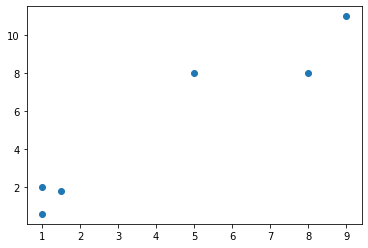

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.show()

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
k_means = KMeans(n_clusters = 2)

In [ ]:
k_means.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
k_means.labels_

array([0, 0, 1, 1, 0, 1], dtype=int32)

In [ ]:
k_means.cluster_centers_

array([[1.16666667, 1.46666667],
       [7.33333333, 9.        ]])

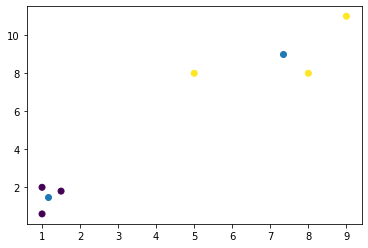

In [ ]:
plt.scatter(X[:,0], X[:,1], c=k_means.labels_)
plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1])
plt.show()

##**Self-Implementation of K-Means**

Here we will code our own K-means algorithm usinf Fit and Predict functions.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = np.array([[1,2], [1.5,1.8], [5,8], [8,8], [1,0.6], [9,11]])

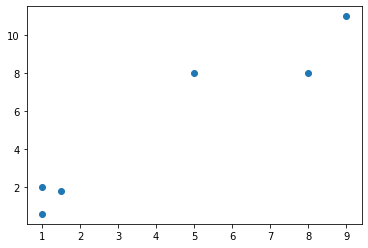

In [ ]:
plt.scatter(X[:,0], X[:,1])
plt.show()

####**Class of K-Means**

In [ ]:
class K_Means:
    def __init__(self, k = 2, max_iter = 100):
        print("constructor")
        self.k = k
        self.max_iter = max_iter
        
        
    def fit (self, data):
        self.means = []
        # randomly initialize the means
        for i in range(self.k):
            self.means.append(data[i])
        for i in range(self.max_iter):
            # assign the data points to the cluster that they belong to
            # create empty clusters        
            clusters = []
            for j in range(self.k):
                clusters.append([])
            for point in data:
                # find distance to all the mean values
                distances = [((point - m)**2).sum() for m in self.means]
                # find the min distance
                minDistance = min(distances)
                # find the mean for which we got the minimum distance --> l
                l = distances.index(minDistance)
                # add this point to cluster l
                clusters[l].append(point)

            # calculate the new mean values
            change = False
            for j in range(self.k):
                new_mean = np.average(clusters[j], axis=0)
                if not np.array_equal(self.means[j], new_mean):
                    change = True
                self.means[j] = new_mean
            if not change:
                break
    
    def predict(self, test_data):
        predictions = []
        for point in test_data:
           # find distance to all the mean values
            distances = [((point - m)**2).sum() for m in self.means]
            # find the min distance
            minDistance = min(distances)
            # find the mean for which we got the minimum distance --> l
            l = distances.index(minDistance)
            # add this point to cluster l
            predictions.append(l)
        return predictions

In [ ]:
kmeans = K_Means(2, 10)

constructor


In [ ]:
kmeans.fit(X)

In [ ]:
kmeans.predict(X)

[0, 0, 1, 1, 0, 1]

In [ ]:
kmeans.means

[array([1.16666667, 1.46666667]), array([7.33333333, 9.        ])]

##**Applications of Clustering**

Clustering has a large no. of applications spread across various domains. Some of the most popular applications of clustering are:
1. Recommendation engines
2. Market segmentation
3. Social network analysis
4. Search result grouping
5. Medical imaging
6. Image segmentation
7. Anomaly detection